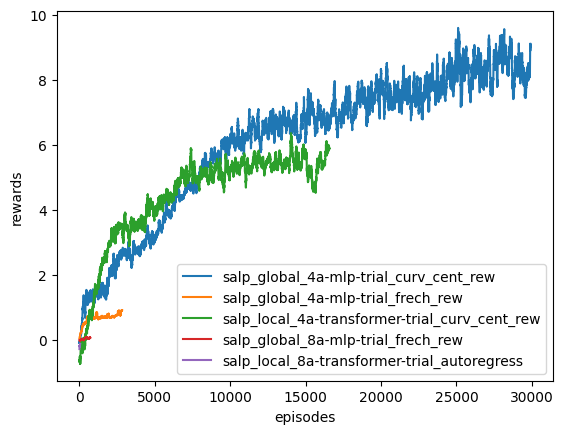

In [11]:
import matplotlib.pyplot as plt
from collections import defaultdict
from pathlib import Path
import csv
import numpy as np
import os
import yaml
import pickle

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

plotting_dir = Path().resolve()
config_dir = plotting_dir / "ppo_config.yaml"

with open(config_dir, "r") as file:
    config = yaml.safe_load(file)

moving_avg_window_size = config["moving_avg_window_size"]
data = []

batches = ["salp_global_4a", "salp_local_4a", "salp_global_8a", "salp_local_8a"]
experiments = ["mlp", "transformer"]
trials=["trial_curv_cent_rew", "trial_frech_rew", "trial_autoregress"]

datapoints = 30000

fig = plt.figure()
ax = fig.add_subplot(111)

for batch in batches:
    for experiment in experiments:
        for trial in trials:
            
            checkpoint_path = Path(f"/home/magraz/research/src/learning/experiments/results/{batch}/{experiment}/{trial}/models/data.dat")

            if checkpoint_path.is_file():
                with open(checkpoint_path, "rb") as handle:
                    data = pickle.load(handle)[:datapoints]

                    rewards_moving_avg = moving_average(data, moving_avg_window_size)
                    ax.plot(rewards_moving_avg, label=f"{batch}-{experiment}-{trial}")

ax.legend()
ax.set_xlabel("episodes")
ax.set_ylabel("rewards")

plt.show()
